# DTM-based filtrations: demo

Raphaël Tinarrage, https://raphaeltinarrage.github.io/
<br/>
Nov 2020

This page describes the implementation and use of the method described in our paper *DTM-based Filtrations* https://arxiv.org/abs/1811.04757.

## Background

The method described in this notebook has been designed to answer the following estimation problem: given a sample of a submanifold, potentially containing anomalous points, estimate the homology groups of the submanifold.

The **DTM-filtration** is a filtration of the Euclidean space $\mathbb{R}^n$, based on a finite point cloud $X \subset \mathbb{R}^n$, and two parameters: $m \in [0,1)$ and $p \in [1, +\infty]$. The parameter $m$ corresponds to the DTM and the parameter $p$ corresponds to the radius functions. 
The DTM-filtration is a particular case of the weighted Čech filtrations.

Let $\mu$ denote the empirical probability measure on $X$, and $\mathrm{d}_{\mu,m}\colon \mathbb{R}^n\rightarrow[0, +\infty)$ the DTM on $\mu$ with parameter $m$.
The DTM-filtration $W[X,m,p]$ is defined as the collection of subsets $(W^t[X,m,p])_{t \geq 0}$ where
$$W^t[X,m,p] = \bigcup_{x \in X} \overline{\mathcal{B}}\big(x,(t^p - \mathrm{d}_{\mu,m}^p(x))^\frac{1}{p}\big),$$
and where $\overline{\mathcal{B}}(x,r)$ denotes the closed ball of center $x$ and radius $r$ if $r \geq 0$, or the emptyset if $r < 0$.

The corresponding persistent module of $i^\text{th}$ homology is obtained by applying the $i^\text{th}$ homology functor to $V[X,m,p]$. Throughout this notebook, we will compute homology over the finite field $\mathbb{Z}/2\mathbb{Z}$.

We shall implement the Vietoris-Rips version of the DTM-filtration, still refered here as the DTM-filtration.

## Datasets

We present here two cases of application of the DTM-filtrations, and compare them with the usual Čech or Rips filtrations:
-  the circle $\mathbb{S}_1$ with anomalous points
-  the necklace (union of a circle and spheres)

## Functions

The functions are defined in the file `DTM_filtrations.py`

We need the following functions:
- **DTM**:                    compute the DTM on a point cloud
- **WeightedRipsFiltrationValue**:       compute the filtration value of an edge in the DTM-filtration
- **WeightedRipsFiltration**: compute the weighted Rips filtration
- **DTMFiltration**:          compute the Rips-DTM-filtration

When the number of points is too large, we propose a heuristic method to reduce the number of simplices, based on the alpha-complex:
- **AlphaDTMFiltration**

The three following functions will serve to generate datasets:
- **SampleOnCircle**    
- **SampleOnSphere**    
- **SampleOnNecklace**    


We work with the Gudhi library.

In [1]:
from DTM_filtrations import *

import gudhi
import numpy as np
import matplotlib.pyplot as plt

## First dataset

We start with a noisy sampling $X$ of the unit circle in $\mathbb{R}^2$.
We aim to recover the homology of the circle: Betti numbers $(\beta_0,\beta_1) = (1,1)$.

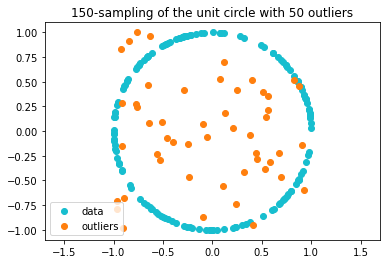

In [2]:
' Sampling on the circle with outlier '
N_obs = 150                                     # number of points sampled on the circle
N_out = 50                                      # number of outliers 
X = SampleOnCircle(N_obs, N_out, is_plot=True)  # sample points with outliers 

We first build the usual Rips filtration on this dataset.

Text(0.5, 1.0, 'Persistence diagram of the Rips complex')

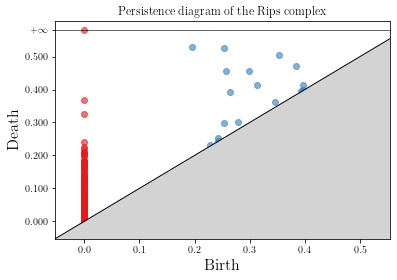

In [3]:
' Usual Rips complex on X '
st_rips = gudhi.RipsComplex(X).create_simplex_tree(max_dimension=2) # create a Rips complex     
diagram_rips = st_rips.persistence()                                # compute the persistence

# plot the persistence diagram
gudhi.plot_persistence_diagram(diagram_rips)                    
plt.title('Persistence diagram of the Rips complex')

On this diagram, 0-homology points are represented in red, and 1-homology in blue.
Note that the 1-homology feature of the circle does not appear clearly here ($\beta_1 = 1$).

We now illustrate a DTM-filtration on $X$.
First, we compute the values of the DTM, with a given parameter $m \in [0,1)$. 

Text(0.5, 1.0, 'Values of the DTM on X with parameter m=0.1')

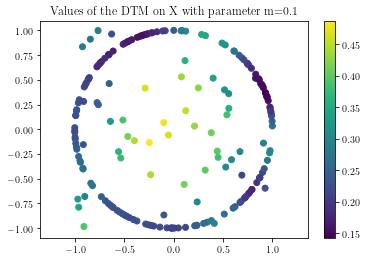

In [4]:
' Compute the DTM on X ' 
# compute the values of the DTM of parameter m
m = 0.1                            
DTM_values = DTM(X,X,m)             

# plot of the DTM
plot=plt.scatter(X[:,0], X[:,1], c=DTM_values)
plt.colorbar(plot)
plt.axis('equal')
plt.title('Values of the DTM on X with parameter m='+str(m))

Notice that the DTM takes greater values on the outliers.

We then build a DTM-filtration, and plot its persistence diagram. The filtration depends on a parameter $p \in [1, +\infty]$.

Weighted Rips Complex is of dimension 2 - 1333500 simplices - 200 vertices. Filtration maximal value is inf.


Text(0.5, 1.0, 'Persistence diagram of the DTM-filtration with parameter p =1')

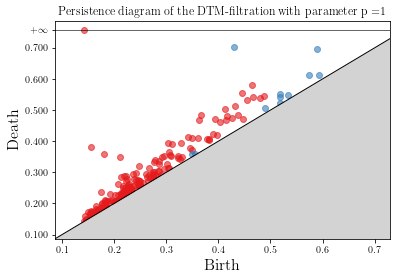

In [5]:
' Compute a DTM-filtration '
p = 1                                             
dimension_max = 2                               # maximal dimension to expand the complex
st_DTM = DTMFiltration(X, m, p, dimension_max)  # creating a simplex tree
diagram_DTM = st_DTM.persistence()              # compute the persistence diagram

# plot the persistence diagram
gudhi.plot_persistence_diagram(diagram_DTM)
plt.title('Persistence diagram of the DTM-filtration with parameter p ='+str(p))

Here, the 1-homology feature of the circle looks separated from the noise on the diagram (blue point). The DTM-filtration is able to recognize the underlying circle.

When $p=1$, the DTM-filtration is already implemented in `gudhi`. It can be used as follows:

Text(0.5, 1.0, 'Persistence diagram of the DTM-filtration with parameter p =1')

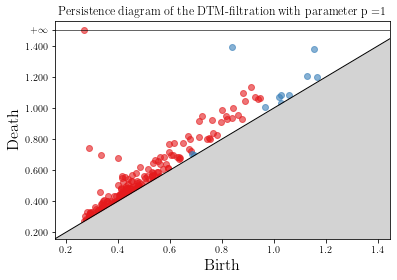

In [6]:
from gudhi.dtm_rips_complex import *

m = 0.1               # parameter of the DTM
N = np.shape(X)[0]    # number of points
k = int(m*N)          # parameter of the DTMRipsComplex in gudhi

dtm_rips = gudhi.dtm_rips_complex.DTMRipsComplex(points=X, k=k)  # DTM-Filtration in gudhi
st_DTM = dtm_rips.create_simplex_tree(max_dimension=2)
diagram_DTM = st_DTM.persistence()                               # compute the persistence diagram

# plot the persistence diagram
gudhi.plot_persistence_diagram(diagram_DTM)
plt.title('Persistence diagram of the DTM-filtration with parameter p ='+str(p))

We show below how greater values of $p$ tend to sparsify the persistence diagram.

Weighted Rips Complex is of dimension 2 - 1333500 simplices - 200 vertices. Filtration maximal value is inf.
Weighted Rips Complex is of dimension 2 - 1333500 simplices - 200 vertices. Filtration maximal value is inf.
Weighted Rips Complex is of dimension 2 - 1333500 simplices - 200 vertices. Filtration maximal value is inf.


<Figure size 432x288 with 0 Axes>

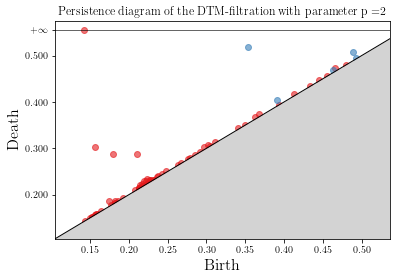

<Figure size 432x288 with 0 Axes>

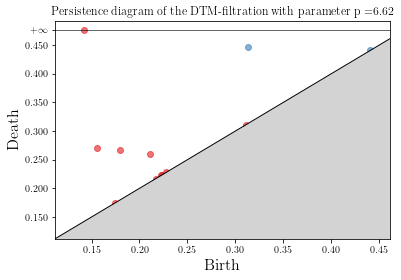

<Figure size 432x288 with 0 Axes>

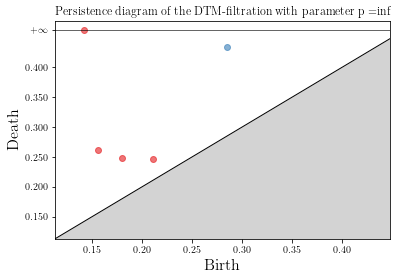

In [7]:
' DTM-filtrations for several values of p '
P = [2, 6.62, np.inf]

for p in P:
    st = DTMFiltration(X, m, p, dimension_max = 2)
    diagram = st.persistence()                  
    
    plt.figure()
    gudhi.plot_persistence_diagram(diagram)      
    plt.title('p ='+str(p))
    plt.title('Persistence diagram of the DTM-filtration with parameter p ='+str(p))

## Second dataset

We sample points on the union of a circle and three spheres in $\mathbb{R}^3$.
Its Betti numbers are $(\beta_0,\beta_1, \beta_3) = (1,4,3)$.

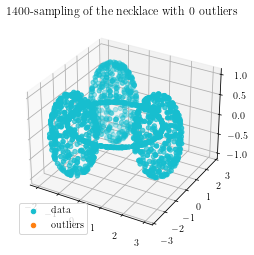

In [8]:
' Example with another dataset: necklace '
N_obs = 350                                           # number of points sampled on each component of the necklace
N_out = 0                                             # number of outliers 
X = SampleOnNecklace(N_obs, N_out, is_plot = True)

Instead of computing the Rips filtration on $X$, which contains 4*N_obs vertices, we build the alpha-complex, which contains less simplices.

Text(0.5, 1.0, 'Persistence diagram of the alpha-complex')

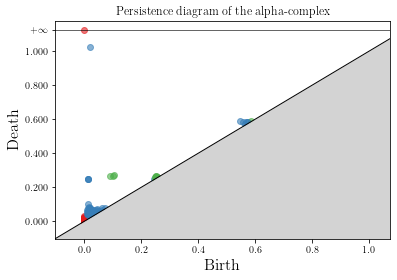

In [9]:
' Usual alpha-complex on X '
st_alpha = gudhi.AlphaComplex(points=X).create_simplex_tree()    # create an alpha-complex
diagram_alpha = st_alpha.persistence()                           # compute the persistence diagram

# plot the persistence diagram
gudhi.plot_persistence_diagram(diagram_alpha)                    #plot the persistence diagram
plt.title('Persistence diagram of the alpha-complex')

Green points represent the 2-homology.
Between the values $t \in [0, 0.2]$ one can read the homology of the underlying object ($\beta_0 = 1$, $\beta_1 = 4$ and $\beta_2 = 3$).

We now build a DTM-filtration on $X$.
First, we illustrate how the value of the parameter $m$ can influence the DTM. When the underlying measure admits a density on a $d$-dimensional submanifold $\mathcal{M}$, there exists a constant $C>0$ such that the DTM on $\mathcal{M}$ is lower than $C m^\frac{1}{d}$.

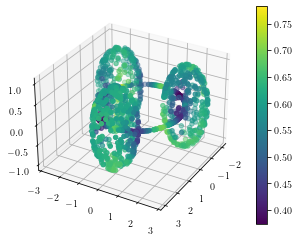

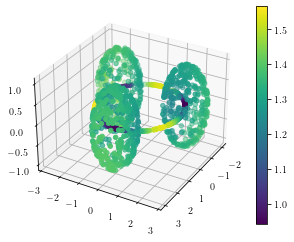

In [10]:
# DTM with parameter m = 0.05
m = 0.05
DTM_values = DTM(X,X,m)

fig = plt.figure(); 
ax = fig.gca(projection='3d')
plot = ax.scatter(X[:,0], X[:,1], X[:,2], c=DTM_values)
fig.colorbar(plot)
ax.view_init(30, 30)

# DTM with parameter m = 0.3
m = 0.3
DTM_values = DTM(X,X,m)

fig = plt.figure(); 
ax = fig.gca(projection='3d')
plot=ax.scatter(X[:,0], X[:,1], X[:,2], c=DTM_values)
fig.colorbar(plot)
ax.view_init(30, 30)

It appears that, for a small value of $m$, the DTM takes lower values on the circle than the spheres, while for a greater value of $m$, the DTM takes high values on the circle and outside the spheres.
This observation is consistent with the previous remark: the DTM on the circle is lower than $C m$, while on the sphere it is lower than $C' m^\frac{1}{2}$.

Since the number of points of $X$ is large, we use the function `AlphaDTMFiltration`.
This construction only is heuristic, but reduces the number of simplices drastically.
We start with the parameter $m = 0,05$.

Alpha Weighted Rips Complex is of dimension 3 - 58543 simplices - 1400 vertices. Filtration maximal value is inf.


Text(0.5, 1.0, 'Persistence diagram of the Alpha-DTM-filtration with parameter p =1')

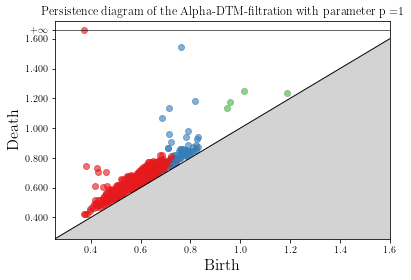

In [11]:
' Compute a DTM-filtration '
m = 0.05
p = 1
dimension_max = 3

# compute the persistence diagram
simplex_tree_DTM_alpha = AlphaDTMFiltration(X, m, p, dimension_max)
diagram_DTM_alpha = simplex_tree_DTM_alpha.persistence()    

# plot the persistence diagram
gudhi.plot_persistence_diagram(diagram_DTM_alpha)     
plt.title('Persistence diagram of the Alpha-DTM-filtration with parameter p ='+str(p))

One can still read the homology of $X$ on this diagram, for the values of $t$ close to 1 ($(\beta_0,\beta_1,\beta_2) = (1,4,3)$).

We now compute the DTM-filtration with the parameter $m = 0,3$.

Alpha Weighted Rips Complex is of dimension 3 - 58543 simplices - 1400 vertices. Filtration maximal value is inf.


Text(0.5, 1.0, 'Persistence diagram of the Alpha-DTM-filtration with parameter p=1')

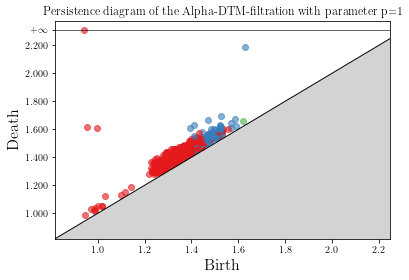

In [12]:
' Compute a DTM-filtration '
m = .3
p = 1
dimension_max = 3

# compute the persistence diagram
simplex_tree_DTM_alpha = AlphaDTMFiltration(X, m, p, dimension_max)
diagram_DTM_alpha = simplex_tree_DTM_alpha.persistence()    

# plot the persistence diagram
gudhi.plot_persistence_diagram(diagram_DTM_alpha)           
plt.title('Persistence diagram of the Alpha-DTM-filtration with parameter p='+str(p))

On this diagram, the homology of the spheres does not appear anymore, and one reads $(\beta_0,\beta_1,\beta_2) = (3,0,0)$ on the first part of the diagram, and $(\beta_0,\beta_1,\beta_2) = (1,1,0)$ on the second part.

Let us compare the DTM-filtrations for several values of $p$.

Alpha Weighted Rips Complex is of dimension 3 - 58543 simplices - 1400 vertices. Filtration maximal value is inf.
Alpha Weighted Rips Complex is of dimension 3 - 58543 simplices - 1400 vertices. Filtration maximal value is inf.
Alpha Weighted Rips Complex is of dimension 3 - 58543 simplices - 1400 vertices. Filtration maximal value is inf.


<Figure size 432x288 with 0 Axes>

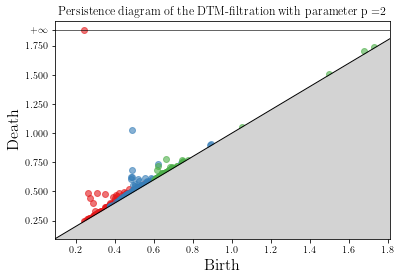

<Figure size 432x288 with 0 Axes>

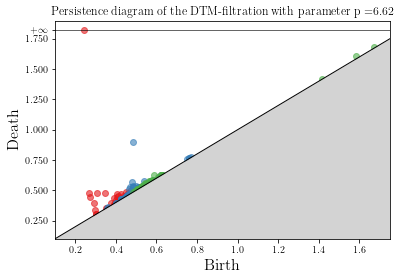

<Figure size 432x288 with 0 Axes>

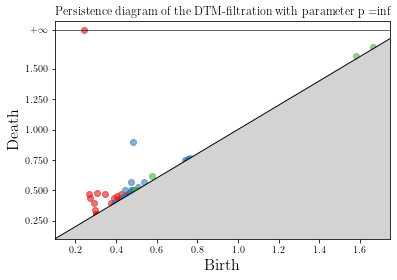

In [13]:
' DTM-filtrations for several values of p '
m = 0.03
P = [2, 6.62, np.inf]
dimension_max = 3

for p in P:
    st = AlphaDTMFiltration(X, m, p, dimension_max)
    diagram = st.persistence()                  
    
    plt.figure()
    gudhi.plot_persistence_diagram(diagram)      
    plt.title('Persistence diagram of the DTM-filtration with parameter p ='+str(p))

Notice that, for large values of $p$, the 2-homology of the underlying spheres does not appear clearly on the diagram. Information have been lost.

## Take-home message

Dependance of the DTM on its parameters:
-  higher values of $p$ tend to simplify the persistence diagram
-  different values of $m$ may highlight various areas of the dataset

This simple implementation can be used as follows:
``` 
# X is a nxd array
m = .1
p = 1                                            
dimension_max = 2     

st = DTMFiltration(X, m, p, dimension_max) 
diagram = st.persistence()
gudhi.plot_persistence_diagram(diagram)
```